In [220]:
'''
Author: Santoshkumar Tonlgi.
'''

#package
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [221]:
class PCAFeatureExtractor:
    def __init__(self, n_components=100):
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)

    def fit_transform_train(self, train_data):
        # Flatten the training images
        train_data_flattened = train_data.reshape((train_data.shape[0], -1))
        
        # Standardize the flattened training data
        train_standardized = self.scaler.fit_transform(train_data_flattened)
        
        # Fit and transform the standardized training data using PCA
        train_pca = self.pca.fit_transform(train_standardized)
        
        print(f"Original shape: {train_data_flattened.shape}")
        print(f"Reduced shape: {train_pca.shape}")
        
        return train_pca

    def transform_test(self, test_data):
        # Flatten the test images
        test_data_flattened = test_data.reshape((test_data.shape[0], -1))
        
        # Standardize the flattened test data using the scaler fitted on the training data
        test_standardized = self.scaler.transform(test_data_flattened)
        
        # Transform the standardized test data using the PCA fitted on the training data
        test_pca = self.pca.transform(test_standardized)
        
        print(f"Original shape: {test_data_flattened.shape}")
        print(f"Reduced shape: {test_pca.shape}")
        
        return test_pca

In [222]:
class Classifier:
    def __init__(self, classifier, classifier_name, dataset_name):
        self.classifier = classifier
        self.classifier_name = classifier_name
        self.dataset_name = dataset_name

    def train(self, train_data, train_label):
        print(f"Training the {self.classifier_name} based Classifer using {self.dataset_name} features.")
        # Train the classifier on training data
        start_time = time.time()
        self.classifier.fit(train_data, train_label)
        elapsed_time = time.time() - start_time
        print(f"Training completed in {elapsed_time:.2f} seconds.")

    def evaluate(self, test_data, y_test):

        y_pred = self.classifier.predict(test_data)

        # Calculate the accuracy of the predictions
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of the Model: {accuracy * 100:.2f}%")
        
        # Calculate metrics
        precision_weighted = precision_score(y_test, y_pred, average='weighted')
        recall_weighted = recall_score(y_test, y_pred, average='weighted')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')

        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')

        # Print the metrics

        print(f"Accuracy: {accuracy:0.2f}")
        print(f"Precision (Weighted): {precision_weighted:0.2f}")
        print(f"Recall (Weighted): {recall_weighted:0.2}")
        print(f"F1 Score (Weighted): {f1_weighted:0.2}")
        print(f"Precision (Macro): {precision_macro:0.2f}")
        print(f"Recall (Macro): {recall_macro:0.2}")
        print(f"F1 Score (Macro): {f1_macro:0.2}")
        

        # Detailed classification report

        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("---------------------------------------\n\n")

        # Compute the confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Visualize the confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        title_name = f'Confusion Matrix - {accuracy * 100:.2f}%'
        plt.title(title_name)
        file_name = f'cf_{self.classifier_name}_{self.dataset_name}.png'
        plt.savefig(file_name)

In [223]:
TrainData = pd.read_csv("./processed_data/NSL-KDD/NSL-KDD_Processed_Train.csv")
TestData = pd.read_csv("./processed_data/NSL-KDD/NSL-KDD_Processed_Test.csv")

In [224]:
TrainData

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,0,146,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
3,0,232,8153,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,199,420,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False
125969,8,105,145,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
125970,0,2231,384,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
125971,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,False


In [225]:
TestData

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,2,12983,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,20,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,1,0,15,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,794,333,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
22540,0,317,938,0,0,0,0,1,0,0,...,False,False,False,False,False,False,False,False,True,False
22541,0,54540,8314,0,0,2,0,1,1,0,...,False,False,False,False,False,False,False,False,True,False
22542,0,42,42,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


In [226]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, MaxAbsScaler


# Initialize MinMaxScaler
# scaler = MinMaxScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = PowerTransformer(method='yeo-johnson')  # or method='box-cox'
# scaler = QuantileTransformer(output_distribution='normal')
# scaler = MaxAbsScaler()





X_train = TrainData.drop('attack', axis=1)

# Normalize the data
normalized_data = scaler.fit_transform(X_train)

# Convert the normalized data back to a DataFrame (if needed)
normalized_df = pd.DataFrame(normalized_data, columns=X_train.columns)



X_test = TestData.drop('attack', axis=1)

# Normalize the data
normalized_test_data = scaler.fit_transform(X_test)

# Convert the normalized data back to a DataFrame (if needed)
normalized_test_data = pd.DataFrame(normalized_test_data, columns=X_test.columns)


from sklearn.preprocessing import LabelEncoder
# Separate features and labels
X_train = normalized_df.values # TrainData.drop('attack', axis=1)
# y_train = pd.get_dummies(TrainData['attack'])

X_test = normalized_test_data.values #TestData.drop('attack', axis=1).values
# y_test = pd.get_dummies(TestData['attack'])

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical column numerically
# y_train = label_encoder.fit_transform(TrainData['attack'])
# y_test = label_encoder.fit_transform(TestData['attack'])

In [227]:
y_train = pd.get_dummies(TrainData['attack'])
y_test = pd.get_dummies(TestData['attack'])

In [228]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (125973, 109)
y_train:  (125973, 5)
X_test:  (22544, 109)
y_test:  (22544, 5)


In [229]:
TrainData['attack'].unique()

array(['normal', 'DoS', 'R2L', 'Probe', 'U2R'], dtype=object)

In [230]:
# PCA feature extractor
# pca_extractor = PCAFeatureExtractor(n_components=50)
# train_pca = pca_extractor.fit_transform_train(X_train)
# test_pca = pca_extractor.transform_test(X_test)

In [231]:
def run_classifier(classifier, classifier_name, train_data, train_label, test_data, test_label):
    ####################################################################################################
    pca_classifier = Classifier(classifier, classifier_name, 'PCA')
    # Train the model using PCA-reduced training data
    pca_classifier.train(train_data, train_label)
    # Evaluate the model using PCA-reduced test data
    pca_classifier.evaluate(test_data, test_label)
    ####################################################################################################

In [232]:
# 1. Decision Tree Classifier
# ------------------------------------------------------------------------------------------------------------------------------
dtc1 = DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=100,
    criterion='gini',
    splitter='best',
    random_state=42 
    )

dtc2 = DecisionTreeClassifier(
    max_depth=12,
    min_samples_leaf=50,
    max_features='sqrt',
    criterion='entropy',
    random_state=42
)

dtc3 = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=20,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)

dtc4 = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    max_features=None,
    min_impurity_decrease=0.01,
    random_state=42
)

dtc5 = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=200,
    splitter='random',
    max_leaf_nodes=30,
    random_state=42
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------------------------------
# 2. Random Forest Classifier
rfc1 = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rfc2 = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
)

rfc3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    max_features='auto',
    random_state=42
)

rfc4 = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    max_features=0.5,
    n_jobs=-1,
    random_state=42
)

rfc5 = RandomForestClassifier(
    n_estimators=120,
    max_depth=8,
    min_samples_leaf=10,
    max_features=0.3,
    criterion='entropy',
    random_state=42
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------------------------------
# 3. K-Nearest Neighbors
knn1 = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=2
)

knn2 = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    algorithm='auto',
    p=2
)

knn3 = KNeighborsClassifier(
    n_neighbors=10,
    weights='uniform',
    algorithm='auto',
    p=2
)

knn4 = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    algorithm='auto',
    p=1
)

knn5 = KNeighborsClassifier(
    n_neighbors=8,
    weights='distance',
    algorithm='ball_tree',
    p=2
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------------------------------
# 4. Support Vector Machine
svm1 = SVC()

svm2 = SVC(
    kernel='rbf',
    C=1,
    gamma='scale',
    random_state=42
)

svm3 = SVC(
    kernel='poly',
    degree=3,
    C=1,
    gamma='auto',
    random_state=42
)

svm4 = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    random_state=42
)

svm5 = SVC(
    kernel='sigmoid',
    C=1,
    gamma='scale',
    random_state=42
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------


# ------------------------------------------------------------------------------------------------------------------------------
# 5. Logistic Regression
log_reg1 = LogisticRegression(C=0.5, solver='liblinear')

log_reg2 = LogisticRegression(C=1.0, solver='sag', max_iter=1000)

log_reg3 = LogisticRegression(C=1.0, solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1000)

log_reg4 = LogisticRegression(C=1.0, solver='liblinear', tol=0.0001)

log_reg5 = LogisticRegression(C=1.0, solver='newton-cg', multi_class='multinomial', max_iter=1000)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------------------------------
# 6. Gradient Boosting Classifier
gbc1 = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gbc2 = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=3,
    random_state=42
)

gbc3 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbc4 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
)

gbc5 = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------------------------------
# 7. AdaBoost Classifier
ada1 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    base_estimator=DecisionTreeClassifier(max_depth=1),
    random_state=42
)

ada2 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.5,
    base_estimator=DecisionTreeClassifier(max_depth=1),
    random_state=42
)

ada3 = AdaBoostClassifier(
    n_estimators=200,
    learning_rate=0.5,
    base_estimator=DecisionTreeClassifier(max_depth=1),
    random_state=42
)

ada4 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    base_estimator=DecisionTreeClassifier(max_depth=2),
    random_state=42
)

ada5 = AdaBoostClassifier(
    n_estimators=150,
    learning_rate=1.0,
    base_estimator=DecisionTreeClassifier(max_depth=2),
    random_state=42
)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------




# ------------------------------------------------------------------------------------------------------------------------------
# 8. Gaussian Naive Bayes
gnb1 = GaussianNB()

gnb2 = GaussianNB(priors=[0.1]*10)

gnb3 = GaussianNB(var_smoothing=1e-9)

gnb4 = GaussianNB(var_smoothing=1e-8)

gnb5 = GaussianNB(var_smoothing=1e-7)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------




# ------------------------------------------------------------------------------------------------------------------------------
# 9. Linear Discriminant Analysis
lda1 = LinearDiscriminantAnalysis()

lda2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None)

lda3 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

lda4 = LinearDiscriminantAnalysis(solver='eigen', shrinkage=None)

lda5 = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------




# ------------------------------------------------------------------------------------------------------------------------------
# 10. Quadratic Discriminant Analysis
qda1 = QuadraticDiscriminantAnalysis()

qda2 = QuadraticDiscriminantAnalysis(reg_param=0.1)

qda3 = QuadraticDiscriminantAnalysis(reg_param=0.5)

qda4 = QuadraticDiscriminantAnalysis(reg_param=0.9)

qda5 = QuadraticDiscriminantAnalysis(store_covariance=True)
# ------------------------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------



In [233]:
# models = {
# #     "Decision Tree": [dtc3],
# #     "Random Forest": [rfc4],
# #     "KNN": [knn1, knn2, knn3, knn4, knn5],
#     "SVM": [svm4],
# #     "Logistic Regression": [log_reg1, log_reg2, log_reg3, log_reg4, log_reg5],
# #     "Gradient Boosting": [gbc5],
# #     "AdaBoost": [ada1, ada2, ada3, ada4, ada5],
# #     "Gaussian NB": [gnb1, gnb2, gnb3, gnb4, gnb5],
# #     "LDA": [lda1, lda2, lda3, lda4, lda5],
# #     "QDA": [qda1, qda2, qda3, qda4, qda5]
# }

In [234]:
#

In [235]:
# for key, model_list in models.items():
#         idx = 1
#         for model in model_list:
#             name = f"{key}_variant_{idx}"
#             print(name)
#             run_classifier(model, name, X_train, y_train, X_test, y_test)            
#             idx += 1
#             print("####################################################\n\n")


In [236]:
# run_classifier(train_pca, y_train, test_pca, y_test)

In [237]:
import tensorflow as tf

def compute_class_weights(class_counts):
    """
    Compute class weights inversely proportional to class frequencies.
    Args:
    class_counts (list or ndarray): List or array containing the count of samples for each class.
    Returns:
    tf.Tensor: Tensor containing weights for each class.
    """
    # Convert counts to a tensor
    class_counts = tf.convert_to_tensor(class_counts, dtype=tf.float32)
    # Compute weights as the inverse of the frequency
    total = tf.reduce_sum(class_counts)
    class_weights = total / class_counts
    # Normalize weights so that the minimum weight is 1.0
    class_weights /= tf.reduce_min(class_weights)
    return class_weights


In [238]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [239]:
print("X_train ", X_train.shape)
print("Y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("Y_test ", y_test.shape)

X_train  (125973, 1, 109)
Y_train  (125973, 5)
X_test  (22544, 1, 109)
Y_test  (22544, 5)


In [240]:
y_unique = set(y_train)

class_label_list = []
for one_hot in y_train.values:
    class_label_list.append(np.argmax(one_hot))

# print(class_label_list)

unique_label = set(class_label_list)
class_counts = []
for ele in unique_label:
    print("ele: ", ele)
    class_counts.append(np.sum(class_label_list == ele))
print(class_counts)

ele:  0
ele:  1
ele:  2
ele:  3
ele:  4
[45927, 11656, 995, 52, 67343]


In [241]:
weights = compute_class_weights(class_counts)
print(weights)

tf.Tensor([1.4663051e+00 5.7775393e+00 6.7681404e+01 1.2950576e+03 1.0000000e+00], shape=(5,), dtype=float32)


In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Softmax, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the number of classes
num_classes = 5
input_shape = (1, 109)

# List of layers
layers = [
    Conv1D(128, kernel_size=1, activation='relu', input_shape=input_shape),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(64, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(32, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(32, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(16, kernel_size=1, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
]

# Create a Sequential model
model = Sequential(layers)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)


# Print model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 1, 128)            14080     
                                                                 
 batch_normalization_48 (Bat  (None, 1, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_56 (Dropout)        (None, 1, 128)            0         
                                                                 
 conv1d_49 (Conv1D)          (None, 1, 64)             8256      
                                                                 
 batch_normalization_49 (Bat  (None, 1, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_57 (Dropout)        (None, 1, 64)            

In [208]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Assuming you have training data X_train and y_train
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


# Fit the model to the training data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=256,
    callbacks=[checkpoint, reduce_lr],
)


# Extract accuracy values from history
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']

# Print accuracy for each epoch
# for epoch, acc in enumerate(train_accuracy):
#     print("ii")
#     print("Epoch {}: Train Accuracy = {:.4f}, Validation Accuracy = {:.4f}".format(epoch+1, acc, val_accuracy[epoch]))


Epoch 1/50
477/493 [============================>.] - ETA: 0s - loss: 0.7450 - accuracy: 0.8542
Epoch 00001: val_accuracy improved from -inf to 0.71558, saving model to best_model.h5
493/493 [==============================] - 2s 3ms/step - loss: 0.7282 - accuracy: 0.8575 - val_loss: 1.6389 - val_accuracy: 0.7156 - lr: 0.0010
Epoch 2/50
483/493 [============================>.] - ETA: 0s - loss: 0.1657 - accuracy: 0.9657
Epoch 00002: val_accuracy improved from 0.71558 to 0.72911, saving model to best_model.h5
493/493 [==============================] - 2s 3ms/step - loss: 0.1652 - accuracy: 0.9658 - val_loss: 1.5349 - val_accuracy: 0.7291 - lr: 0.0010
Epoch 3/50
485/493 [============================>.] - ETA: 0s - loss: 0.1214 - accuracy: 0.9753
Epoch 00003: val_accuracy improved from 0.72911 to 0.73274, saving model to best_model.h5
493/493 [==============================] - 2s 3ms/step - loss: 0.1211 - accuracy: 0.9753 - val_loss: 1.5291 - val_accuracy: 0.7327 - lr: 0.0010
Epoch 4/50
48

Epoch 27/50
486/493 [============================>.] - ETA: 0s - loss: 0.0314 - accuracy: 0.9944
Epoch 00027: val_accuracy improved from 0.79835 to 0.79897, saving model to best_model.h5
493/493 [==============================] - 2s 3ms/step - loss: 0.0315 - accuracy: 0.9944 - val_loss: 1.6808 - val_accuracy: 0.7990 - lr: 1.0000e-05
Epoch 28/50
487/493 [============================>.] - ETA: 0s - loss: 0.0306 - accuracy: 0.9943
Epoch 00028: val_accuracy did not improve from 0.79897
493/493 [==============================] - 2s 3ms/step - loss: 0.0307 - accuracy: 0.9943 - val_loss: 1.6940 - val_accuracy: 0.7987 - lr: 1.0000e-05
Epoch 29/50
480/493 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9941
Epoch 00029: val_accuracy improved from 0.79897 to 0.79955, saving model to best_model.h5
493/493 [==============================] - 2s 3ms/step - loss: 0.0304 - accuracy: 0.9941 - val_loss: 1.6889 - val_accuracy: 0.7995 - lr: 1.0000e-05
Epoch 30/50
484/493 [=========

In [242]:
print(X_test.shape)
print(y_test.shape)

(22544, 1, 109)
(22544, 5)


In [210]:
from tensorflow.keras.models import load_model
model = load_model('./best_model.h5')

In [211]:
y_test = np.argmax(y_test, axis = 1)

In [243]:
y_pred = model.predict(X_test)

In [246]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(np.argmax(y_test, axis = 1), np.argmax(y_pred, axis = 1))
print(f"Accuracy of the Model: {accuracy * 100:.2f}%")

Accuracy of the Model: 79.96%


In [247]:
y_pred

array([[9.99732196e-01, 8.32701771e-05, 1.05096815e-05, 5.01267141e-06,
        1.69005201e-04],
       [9.99713004e-01, 8.94527402e-05, 1.14283603e-05, 5.44185650e-06,
        1.80529663e-04],
       [6.98072472e-05, 5.25038595e-05, 4.23569145e-05, 1.09465800e-05,
        9.99824464e-01],
       ...,
       [9.99080181e-01, 2.58294371e-04, 4.88325495e-05, 2.18390996e-05,
        5.90886571e-04],
       [6.91573878e-05, 5.20325011e-05, 4.19246790e-05, 1.08393297e-05,
        9.99826133e-01],
       [5.03283751e-04, 9.90632415e-01, 6.61357190e-04, 1.79964642e-04,
        8.02295562e-03]], dtype=float32)

Accuracy of the Model: 79.96%
Accuracy: 0.80
Precision (Weighted): 0.82
Recall (Weighted): 0.8
F1 Score (Weighted): 0.76
Precision (Macro): 0.66
Recall (Macro): 0.54
F1 Score (Macro): 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      7460
           1       0.79      0.75      0.77      2421
           2       0.84      0.09      0.16      2885
           3       0.00      0.00      0.00        67
           4       0.72      0.96      0.82      9711

    accuracy                           0.80     22544
   macro avg       0.66      0.54      0.53     22544
weighted avg       0.82      0.80      0.76     22544

---------------------------------------




/usr/local/python-env/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/python-env/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/python-env/py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/python-env/py38/lib/python3.8/site

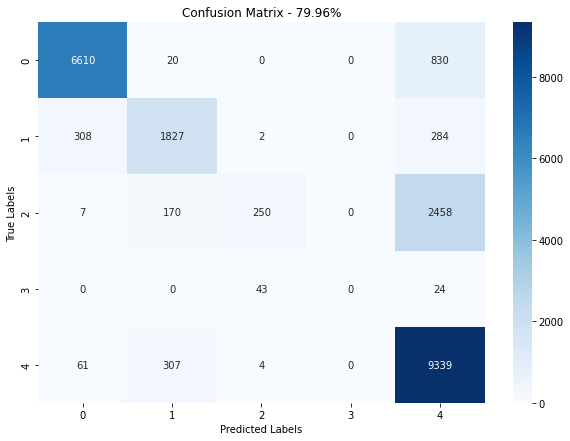

In [212]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis = 1)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Model: {accuracy * 100:.2f}%")

# Calculate metrics
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

precision_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')

# Print the metrics

print(f"Accuracy: {accuracy:0.2f}")
print(f"Precision (Weighted): {precision_weighted:0.2f}")
print(f"Recall (Weighted): {recall_weighted:0.2}")
print(f"F1 Score (Weighted): {f1_weighted:0.2}")
print(f"Precision (Macro): {precision_macro:0.2f}")
print(f"Recall (Macro): {recall_macro:0.2}")
print(f"F1 Score (Macro): {f1_macro:0.2}")


# Detailed classification report

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("---------------------------------------\n\n")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
title_name = f'Confusion Matrix - {accuracy * 100:.2f}%'
plt.title(title_name)
file_name = 'cf_matrix_cnn.png'
plt.savefig(file_name)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
X_test = np.squeeze(X_test, axis = 1)
print(X_test.shape)

/usr/local/python-env/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/python-env/py38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


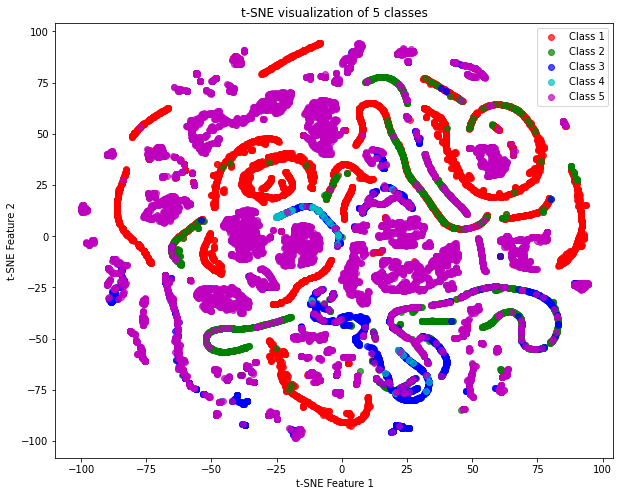

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification

# Generate a sample dataset with 5 classes

X = y_pred
y = np.argmax(y_test, axis = 1)
# Compute t-SNE embedding

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plotting the result

plt.figure(figsize=(10, 8))
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(5):
    indices = y == i
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], c=colors[i], label=f'Class {i+1}', alpha=0.7)

plt.legend()
plt.title('t-SNE visualization of 5 classes')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()

In [250]:
y_pred.shape

(22544, 5)

,DoS,Probe,R2L,U2R,normal
0,True,False,False,False,False
1,True,False,False,False,False
2,False,False,False,False,True
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
22539,False,False,False,False,True
22540,False,False,False,False,True
22541,True,False,False,False,False
22542,False,False,False,False,True
